In [1]:
import subprocess as sp
import matplotlib.pyplot as plt

from __init__ import *
from snmcseq_utils import create_logger
from snmcseq_utils import cd

In [2]:
log = create_logger()
log.info('.')

06/11/2018 02:24:14 PM .


In [21]:
dataset = 'CEMBA_1C_180212'
path_dataset = os.path.join(PATH_DATASETS, dataset)

# Gzip to bgzip

In [ ]:
# make allc folder and symlic from from_ecker_lab

os.makedirs(os.path.join(path_dataset, 'allc'))

## Case 1

In [5]:
# allc_folders = glob.glob(os.path.join(path_dataset, 'from_ecker_lab', '*'))

# should be parallelized in the future
# for i, allc_folder in enumerate(allc_folders):
data_folder = os.path.join(PATH_DATASETS, dataset, 'from_ecker_lab')
with cd(data_folder):
    allc_files = glob.glob('allc_*.tsv.gz')
    allc_files = glob.glob('allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.gz')
    for i, allc_file in enumerate(allc_files):
        # if src == 'allc_180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_1_CEMBA180104_4B_2_H8_AD002_indexed.tsv.gz':
        
        src = allc_file
        
        dst = os.path.join(path_dataset, 'allc', src)
        dst = (os.path.splitext(dst)[0] +'.bgz')

        logging.info("gzip to bgzip ({}/{}): {}".format(i+1, len(allc_files), src))
        
        # .tsv.gz to .tsv 
        cmd = 'gzip -cd {} > {}'.format(src, os.path.splitext(src)[0]) 
        os.system(cmd)

        # bgzip
        cmd = 'bgzip -c {} > {}'.format(os.path.splitext(src)[0], dst) 
        os.system(cmd)

        # rm tmp files
        os.remove(os.path.splitext(src)[0])

03/18/2018 08:48:27 PM gzip to bgzip (1/1): allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.gz


## Case 2

In [ ]:
allc_folders = glob.glob(os.path.join(path_dataset, 'from_ecker_lab', '*'))
# should be parallelized in the future
for i, allc_folder in enumerate(allc_folders):
    with cd(allc_folder):
        allc_files = glob.glob('allc_*.tsv.gz')
        assert len(allc_files) == 1
        src = allc_files[0]
    
        # if src == 'allc_180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_1_CEMBA180104_4B_2_H8_AD002_indexed.tsv.gz':
        dst = os.path.join(path_dataset, 'allc', src)
        dst = (os.path.splitext(dst)[0] +'.bgz')

        logging.info("gzip to bgzip ({}/{}): {}".format(i+1, len(allc_folders), src))
        # .tsv.gz to .tsv 
        cmd = 'gzip -cd {} > {}'.format(src, os.path.splitext(src)[0]) 
        os.system(cmd)

        # bgzip
        cmd = 'bgzip -c {} > {}'.format(os.path.splitext(src)[0], dst) 
        os.system(cmd)

        # rm tmp files
        os.remove(os.path.splitext(src)[0])


# Tabix index

In [11]:
# try tabix (could be parallelized)
with cd(os.path.join(path_dataset, 'allc')):
    allc_files = glob.glob(os.path.join(path_dataset, 'allc', '*'))
    allc_files = glob.glob(os.path.join(path_dataset, 'allc', 'allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.bgz'))
    for i, allc_file in enumerate(allc_files):
        os.system('tabix -f -s 1 -b 2 -e 2 -S 0 ' + allc_file) 
        logging.info("Done tabix indexing ({}/{}): {}".format(i+1, len(allc_files), allc_file))

FileNotFoundError: [Errno 2] No such file or directory: '/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/CEMBA_3A_180129/allc'

# Mapping summary

In [22]:
# mapping summary
f = os.path.join(PATH_REFERENCES, 'Mapping_summary', 'CEMBA_1C_summary.txt')
df = pd.read_table(f) 
# filter

df['dataset'] = df['Sample'].apply(lambda x: '_'.join(['CEMBA', 
                                       x.split('_')[7],
                                       x.split('_')[6][len('CEMBA'):]]
                                                     ))
dataset_rep = '_'.join(dataset.split('_')[:3])
df = df[df['dataset']==dataset_rep].drop('dataset', axis=1)
print(df.shape)
df.head()

(1266, 15)


,Sample,Total reads,Mapped reads,Mapping rate,Nonclonal reads,% Nonclonal rate,Filtered reads,Filtered rate,Lambda mC/C,mCCC/CCC,mCG/CG,mCH/CH,Estimated mCG/CG,Estimated mCH/CH,% Genome covered
1383,180320_CEMBA_mm_P56_P63_1C_CEMBA180212_1C_1_CE...,3163266,2109035,0.667,1689544,0.801,1482421,0.877,0.00763,0.00348,0.78425,0.01130,0.78350,0.00785,6.20
1384,180320_CEMBA_mm_P56_P63_1C_CEMBA180212_1C_1_CE...,2865716,1933171,0.675,1550849,0.802,1354551,0.873,NaN,0.00405,0.77591,0.01526,0.77500,0.01126,5.69
1385,180320_CEMBA_mm_P56_P63_1C_CEMBA180212_1C_1_CE...,3368126,2267385,0.673,1819332,0.802,1579098,0.868,NaN,0.00502,0.76502,0.01939,0.76383,0.01444,6.59
1386,180320_CEMBA_mm_P56_P63_1C_CEMBA180212_1C_1_CE...,3658742,2474500,0.676,1987951,0.803,1708052,0.859,NaN,0.00576,0.78351,0.02575,0.78226,0.02011,7.11
1387,180320_CEMBA_mm_P56_P63_1C_CEMBA180212_1C_1_CE...,2496440,1666166,0.667,1334808,0.801,1139639,0.854,0.01075,0.00542,0.78166,0.02405,0.78047,0.01873,4.80


In [23]:
# move allc inplace

# dst = '/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/{}/from_ecker_lab'.format(dataset)
# if not os.path.isdir(dst):
#     os.makedirs(dst)
    
# with cd('/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/3F/from_ecker_lab'):
#     dirs = [dirc for dirc in sorted(glob.glob('*')) if os.path.isdir(dirc)]
#     for dirc in dirs:
#         if dirc[:-len('_bismark')] in df['Sample'].tolist():
#             print(dirc)
#             cmd = 'mv {} {}'.format(dirc, dst)
#             os.system(cmd)
            
            


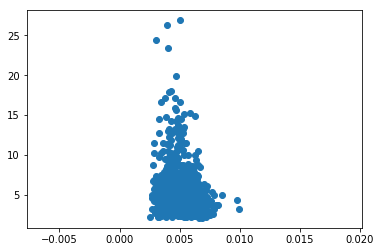

In [24]:

fig, ax = plt.subplots()
ax.scatter(df['mCCC/CCC'].values, df['% Genome covered'].values)
plt.show()


In [25]:
# move allc to allc trash

print(df.loc[df['mCCC/CCC'] > 0.02, 'Sample'].tolist())

df[df['mCCC/CCC']<0.02].set_index('Sample').to_csv(
    os.path.join(PATH_DATASETS, dataset, 'mapping_summary_{}.tsv'.format(dataset)), 
    sep='\t', na_rep='NA', header=True, index=True)

# truncate mapping summary and copy that into right place

[]


In [9]:

# df.to_csv(os.path.join(path_dataset, 'mapping_summary_{}.tsv'.format(dataset)), 
#                       sep='\t', na_rep='NA', header=True, index=False)

In [17]:
# with cd(path_dataset)
#     allc_files = sorted(glob.glob('./allc/allc_*.tsv.bgz'))
#     cells = [os.path.basename(allc_file)[len('allc_'): -len('.tsv.bgz')] for allc_file in allc_files]
# df_meta_dataset = df.set_index('Sample').loc[cells, :]

In [10]:
# print(df_meta_dataset.shape)

# df_meta_dataset.to_csv(os.path.join(path_dataset, 'mapping_summary_{}.tsv'.format(dataset)), 
#                       sep='\t', na_rep='NA', header=True, index=True)
# df_meta_dataset.head()